# Flight Price Prediction Analysis And Prediction

### Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 


### TASKS

* Prepare a complete data analysis report on the given data.

* Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.


### Dataset Info

We have to analyze the flight fare prediction using Machine Learning dataset using essential exploratory data analysis techniques then will draw some predictions about the price of the flight based on some features such as what type of airline it is, what is the arrival time, what is the departure time, what is the duration of the flight, source, destination and more

### Attribute Information

* Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
* Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.
* Source: This column holds the name of the place from where the passenger’s journey will start.
* Destination: This column holds the name of the place to where passengers wanted to travel.
* Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
* Arrival_Time: Arrival time is when the passenger will reach his/her destination.
* Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.
* Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.
* Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
* Price: Price of the flight for a complete journey including all the expenses before onboarding.


### Import Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###  Importing Dataset

In [2]:
Flight_data=pd.read_excel("Flight_Fare.xlsx")
print(Flight_data.head())
print(Flight_data.shape)

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  
(10683, 11)


### Basic Checks

In [3]:
Flight_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
Flight_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
Flight_data.shape

(10683, 11)

In [6]:
Flight_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
Flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
Flight_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
Flight_data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

## Data preprocessing

In [10]:
Flight_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [11]:
Flight_data.dropna(inplace = True)

In [12]:
Flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Exploratory Data Analysis

#### Univariate

<Axes: xlabel='Price', ylabel='Count'>

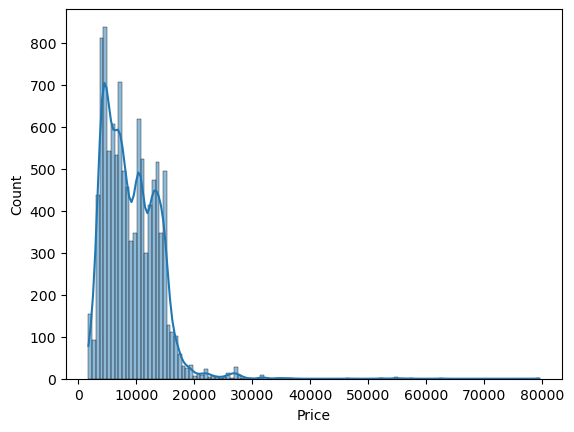

In [13]:
sns.histplot(Flight_data.Price,kde=True)

#### Bivarate

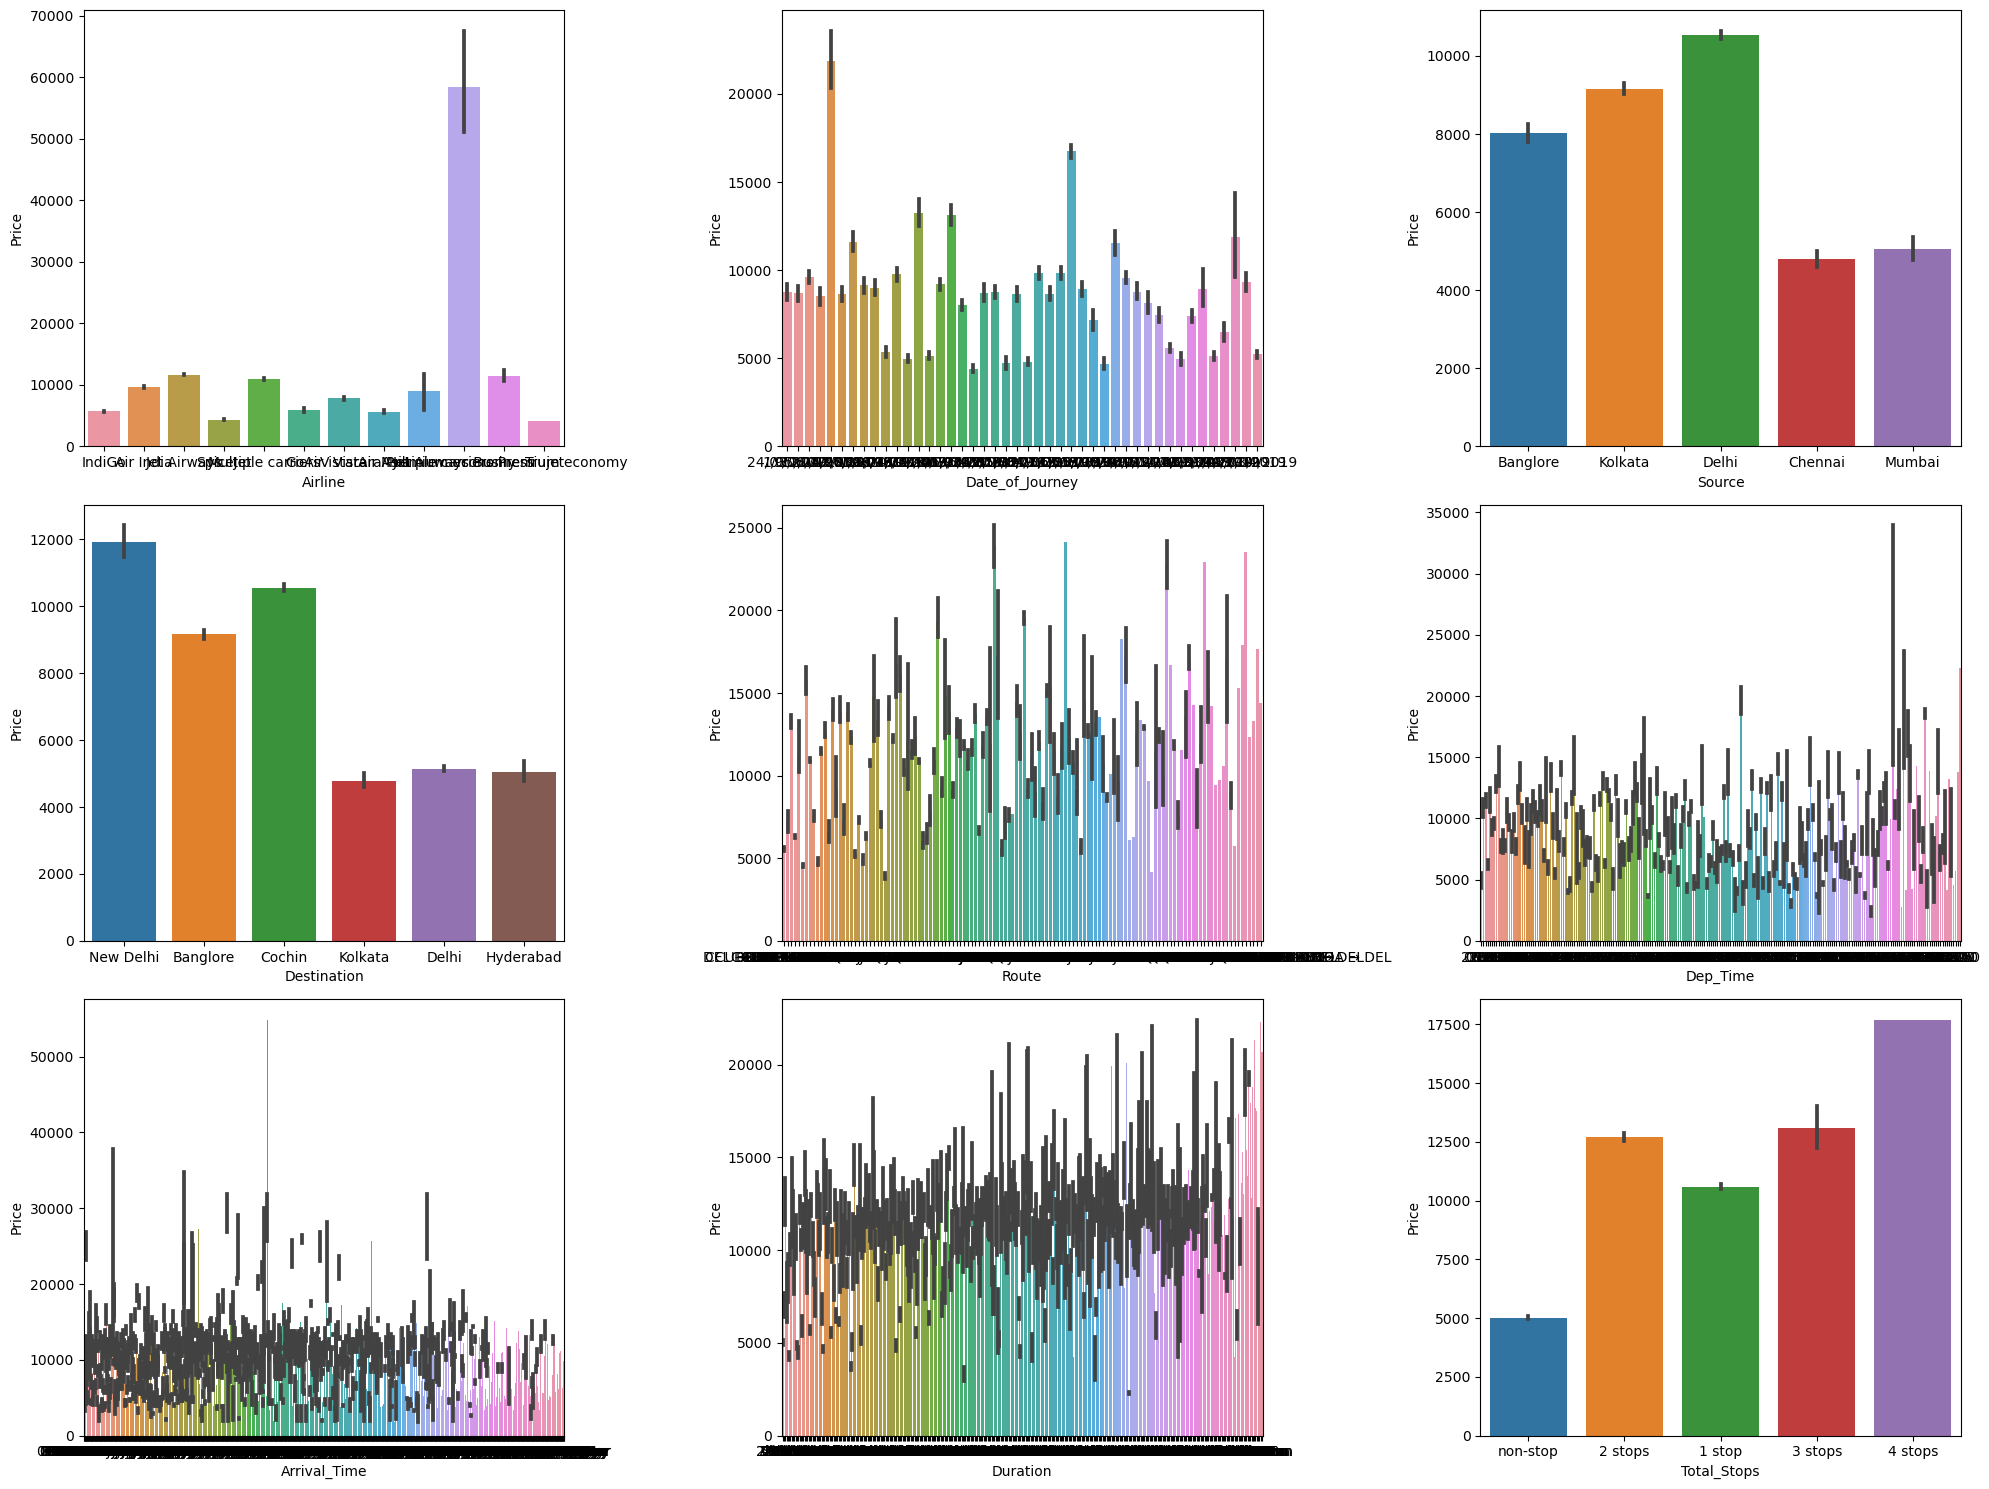

In [14]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in Flight_data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x=Flight_data[column],y=Flight_data['Price'])
        plt.xlabel(column)
        plt.ylabel('Price')
    
    plotnumber+=1
plt.tight_layout()
plt.show()

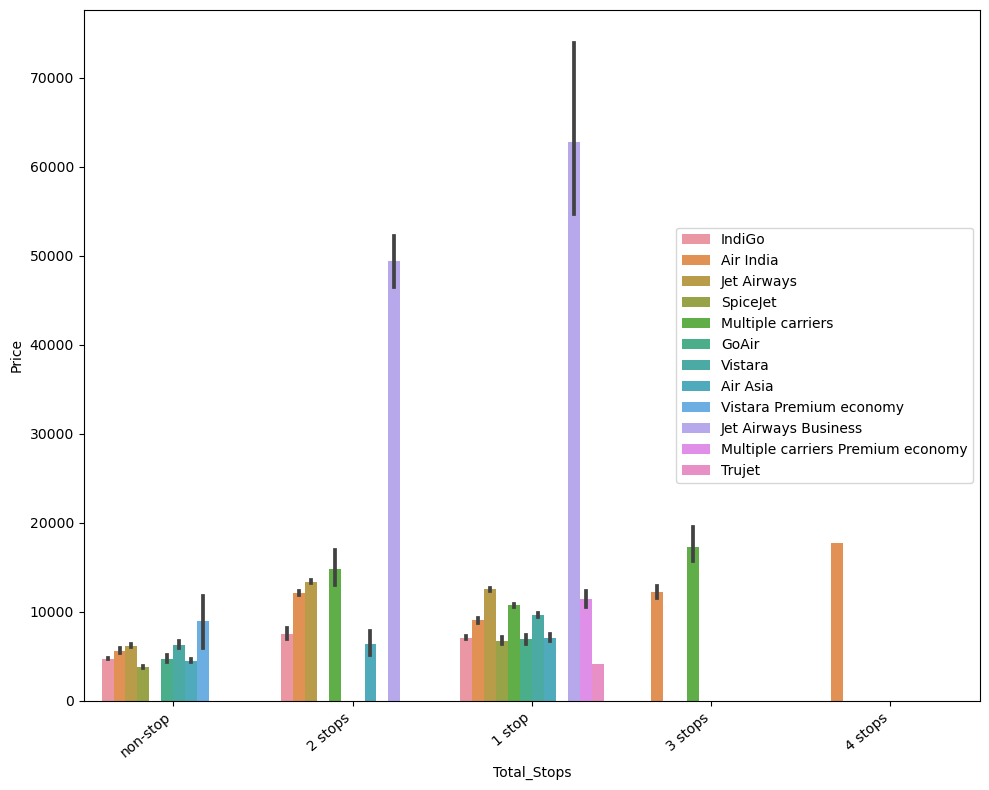

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(data=Flight_data,x='Total_Stops',y='Price',hue='Airline')
plt.legend(loc='right')
plt.xticks(rotation=40,ha='right')
plt.tight_layout()


From description we can see that Date_of_Journey is a object data type,

Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype. 

* dt.day method will extract only day of that date 
* dt.month method will extract only month of that date


In [16]:
Flight_data["Journey_day"] = pd.to_datetime(Flight_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [17]:
Flight_data[ "Journey_month"] = pd. to_datetime(Flight_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [18]:
Flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [19]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

Flight_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [20]:
# Departure time is when a plane Leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
Flight_data["Dep_hour"] = pd.to_datetime(Flight_data["Dep_Time"]).dt.hour

# Extracting Minutes
Flight_data["Dep_min"] = pd. to_datetime(Flight_data["Dep_Time"]) .dt.minute

# Now we can drop Dep_Time as it is of no use
Flight_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [21]:
Flight_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [22]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
Flight_data["Arrival_hour"] = pd.to_datetime(Flight_data["Arrival_Time"]).dt.hour

# Extracting Minutes
Flight_data["Arrival_min"] = pd.to_datetime(Flight_data["Arrival_Time"]).dt.minute

# Now we can drop Arrival_Time as it is of no use
Flight_data.drop(["Arrival_Time"], axis=1, inplace=True)

In [23]:
Flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [24]:
# Assigning and converting Duration column into a list
duration = list(Flight_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"    # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))             # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))  # Extracts only minutes from duration

In [25]:
Flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [26]:
# Adding duration_hours and duration_mins list to Flight_data dataframe

Flight_data["Duration_hours"] = duration_hours
Flight_data["Duration_mins"] = duration_mins

In [27]:
Flight_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [28]:
Flight_data.drop(["Duration"], axis = 1, inplace = True)

In [29]:
Flight_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data

One can find many ways to handle categorical data. Some of them catagorical data are,

1. Nominal Data --> data are not in any order --> OneHotEncoder is user in that case
2. Ordinal data --> data are in order --> LabelEncoder is used in that case 

In [30]:
Flight_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

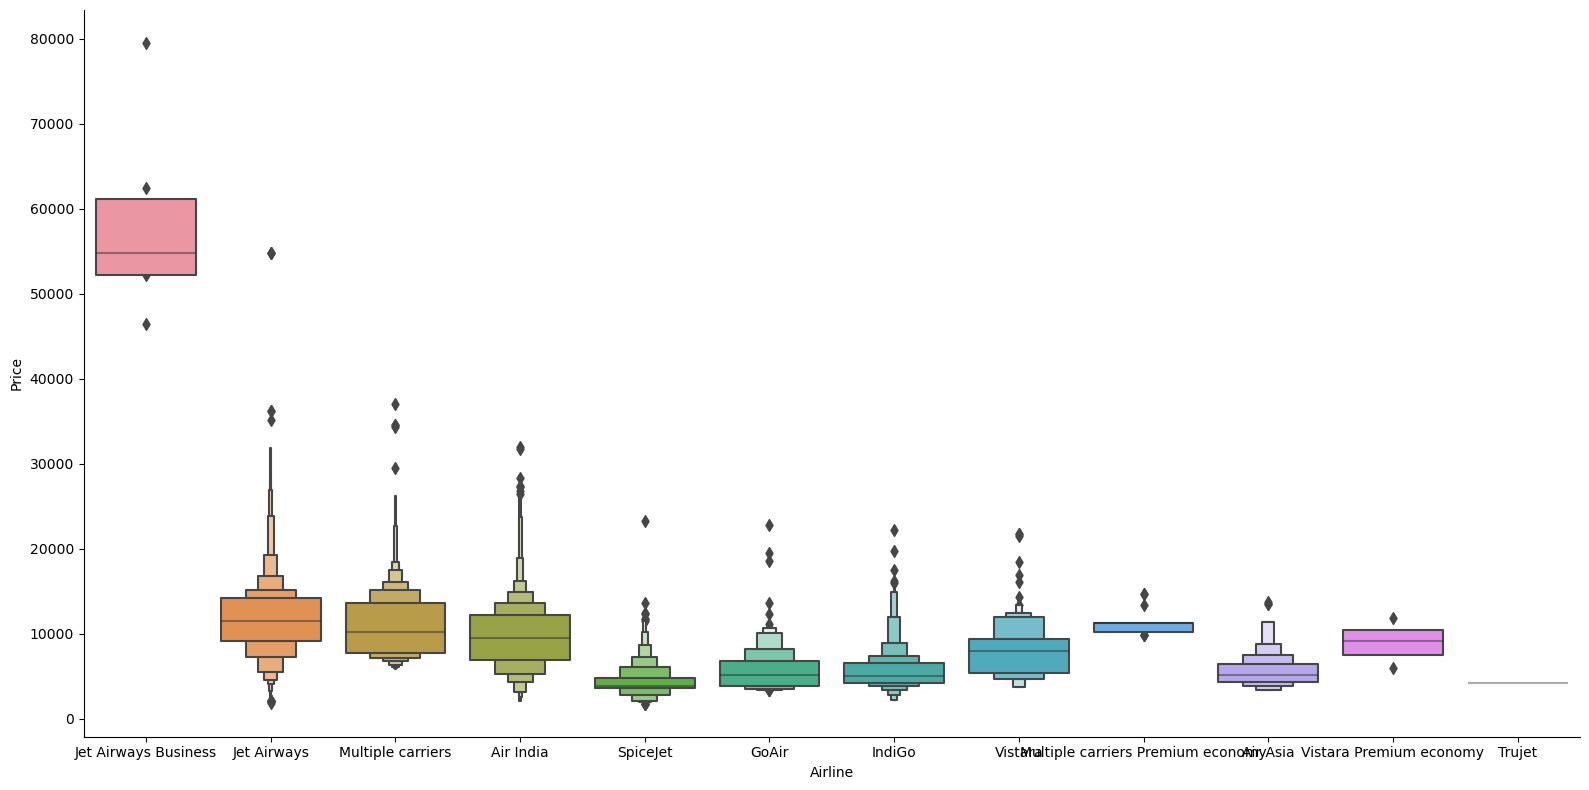

In [31]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(x="Airline", y="Price", data=Flight_data.sort_values("Price", ascending=False), kind="boxen", height=8, aspect=2)
plt.show()

In [32]:
# As Airline is Normal Categorical data we will perform OneHotEncoding

Airline = Flight_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [33]:
Flight_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

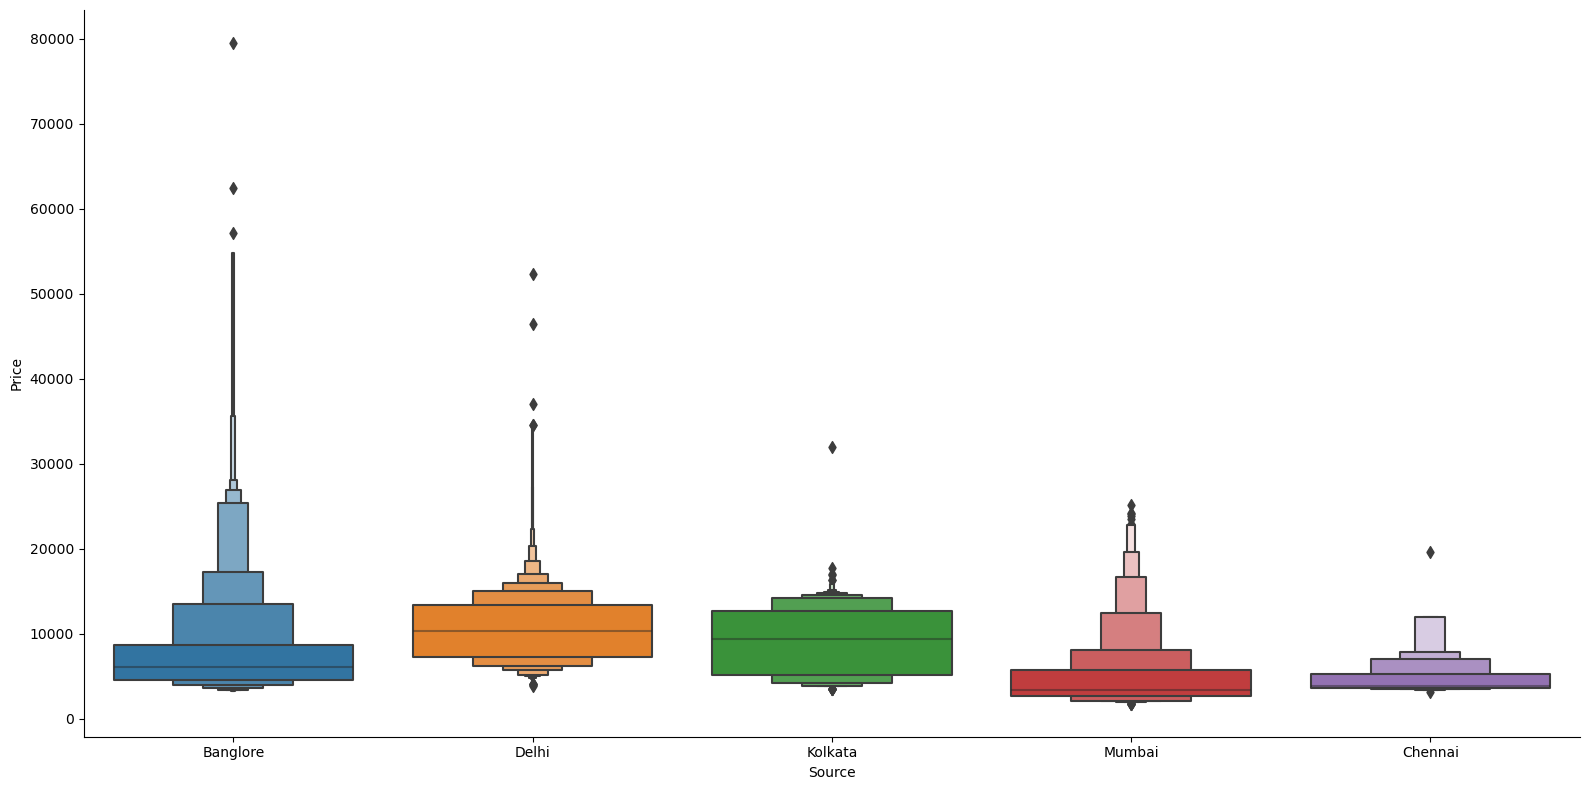

In [34]:
# Source vs Price

sns.catplot(x="Source", y="Price", data=Flight_data.sort_values("Price", ascending=False), kind="boxen", height=8, aspect=2)
plt.show()

In [35]:
# As Source is Normal Categorical data we will perform OneHotEncoding

Source = Flight_data[["Source"]]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
Flight_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
# As Destination is Normal Categorical data we will perform OneHotEncoding

Destination = Flight_data[["Destination"]]
Source = pd.get_dummies(Destination, drop_first=True)
Source.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
Flight_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [39]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

Flight_data.drop(["Route", "Additional_Info"], axis =1, inplace = True)

In [40]:
Flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [41]:
Flight_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
# As this is the case of Ordinal Categorical type we perform LabelEncoder
# Here values are assigned with correponding keys 

Flight_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [43]:
Flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [44]:
#Concatenate datframe --> Flight_data + Airline + Source + Destination 
Data_flight = pd.concat([Flight_data, Airline, Source, Destination], axis = 1) 

In [45]:
Data_flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Destination
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,1,New Delhi
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,0,Banglore
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,0,0,1,0,0,0,0,Cochin
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,0,0,0,0,0,0,Banglore
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,1,New Delhi


In [46]:
Data_flight.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [47]:
Data_flight.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


# Feature Selection 


In [48]:
Data_flight.shape

(10682, 26)

In [49]:
Data_flight.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [50]:
x = Data_flight.loc[:, ['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,Airline_Air India,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,25,1,...,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,25,0,...,0,0,0,0,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,45,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
Data_flight['Price']=np.log(Data_flight['Price'])
y = Data_flight.iloc[:, 1]
y.head()

0    8.267962
1    8.944028
2    9.538348
3    8.735204
4    9.495670
Name: Price, dtype: float64

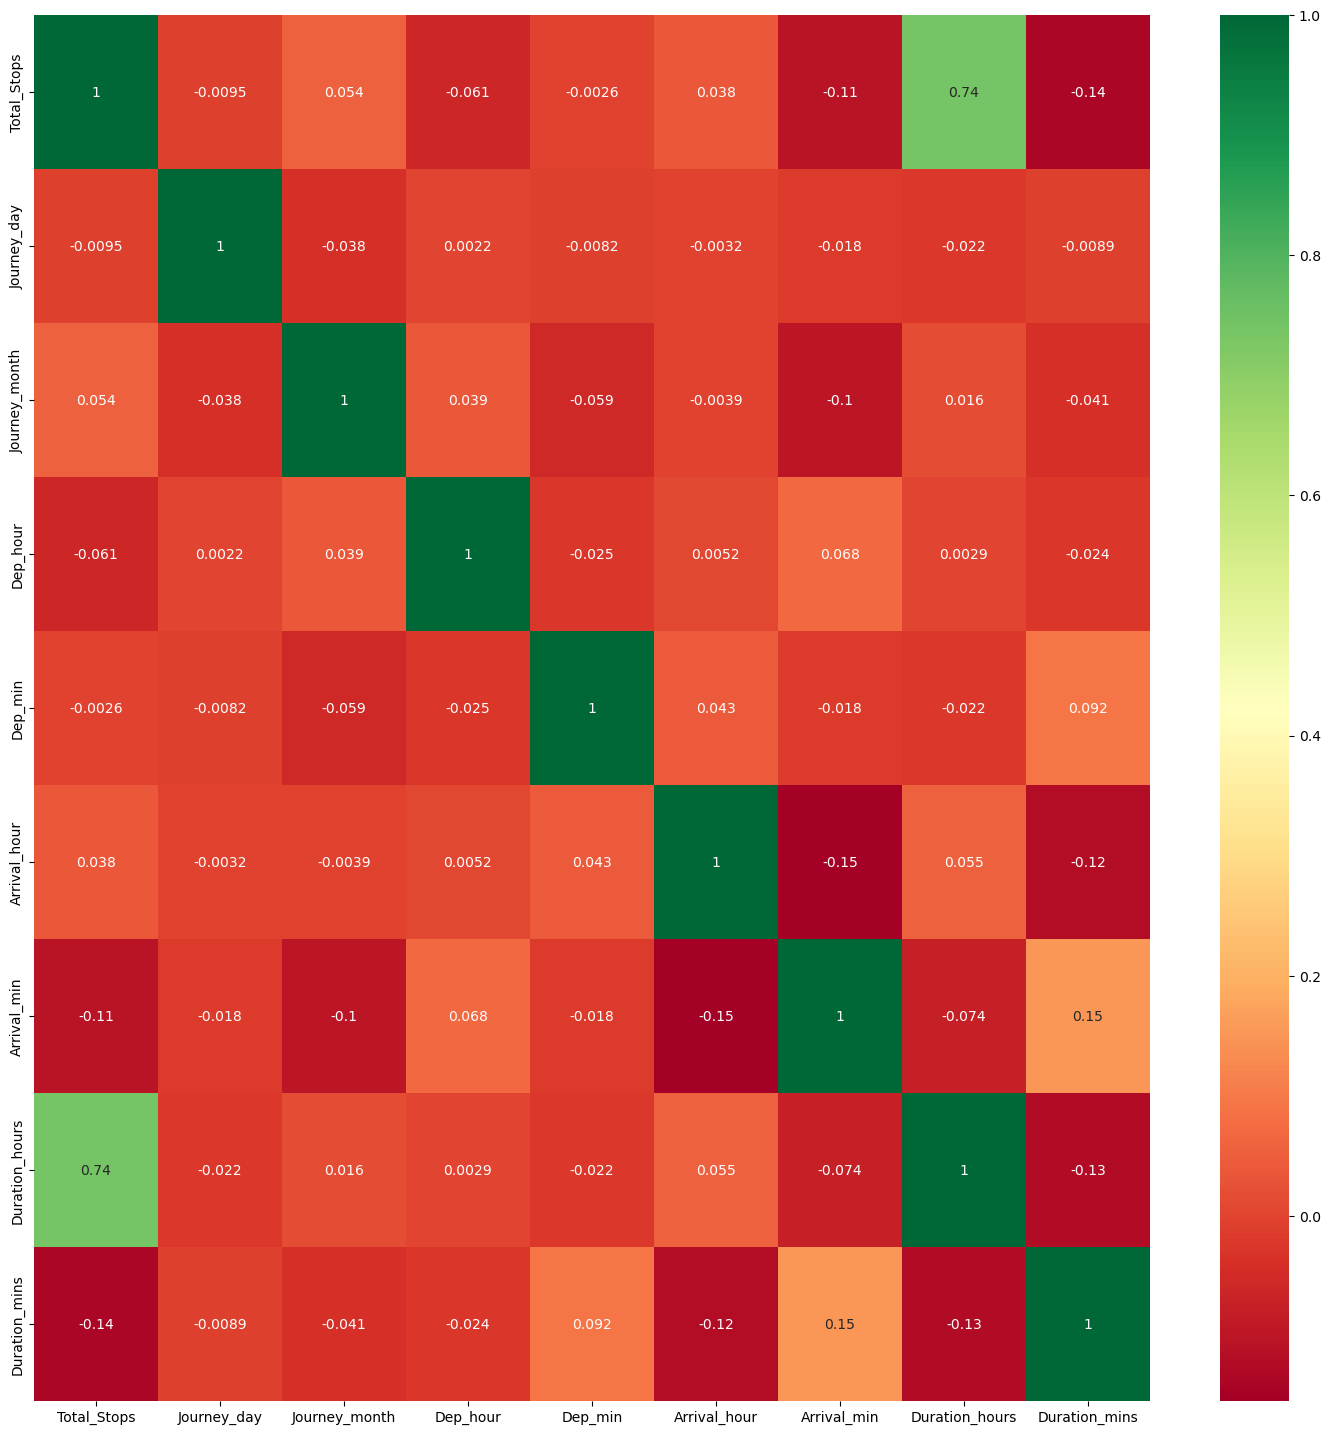

In [52]:
# Find correlation between Independent and Dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(Flight_data.drop('Price',axis=1).corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [53]:
# Important feature using ExtraTreesRegressor

from sklearn. ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor ()
selection.fit(x,y)

ExtraTreesRegressor()

In [54]:
print(selection.feature_importances_)

[2.58424929e-01 4.44168447e-01 5.56329640e-03 3.49148762e-03
 6.33340221e-04 5.43593558e-04 6.65261114e-04 3.26584987e-04
 1.80705719e-04 1.51021406e-02 7.15581619e-04 2.11484930e-02
 1.33382921e-01 2.66626192e-03 2.20444922e-03 1.90919040e-05
 5.12494276e-03 2.11013215e-06 4.79969111e-03 7.09524097e-07
 5.24292777e-02 1.48809854e-02 2.67786634e-02 2.76975449e-04
 6.47006047e-03]


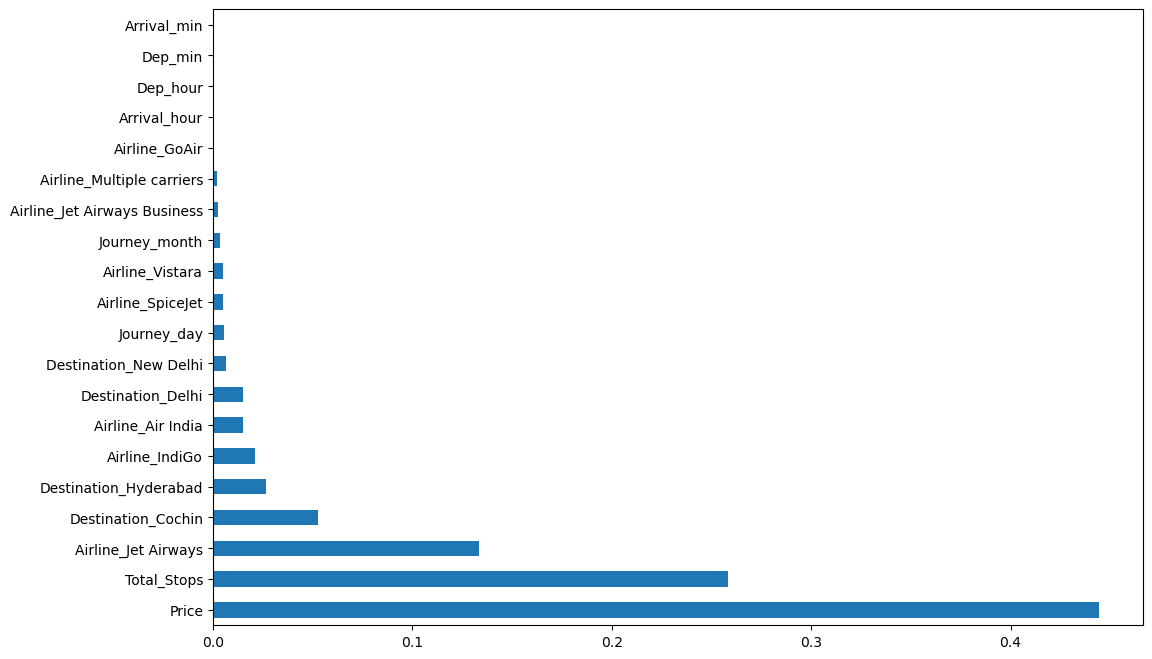

In [55]:
#Plot graph of feature importances for better visualization 

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20) .plot(kind='barh')
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 10)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [58]:
from sklearn.model_selection import RandomizedSearchCV 
from xgboost import XGBRegressor 
import warnings

In [59]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [60]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Support Vector Regressor":SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(), 
   
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])
    
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2) 
    print('='*35) 
    print('\n') 

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1097
- Mean Squared Error: 0.0120
- Mean Absolute Error: 0.0720
- R2 Score: 0.9543
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1291
- Mean Squared Error: 0.1291
- Mean Absolute Error: 0.0734
- R2 Score: 0.9371


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0038
- Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0004
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0028
- Mean Squared Error: 0.0028
- Mean Absolute Error: 0.0006
- R2 Score: 1.0000


Support Vector Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0704
- Mean Squared Error: 0.0050
- Mean Absolute Error: 0.0631
- R2 Score: 0.9812
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0692
- Mean Squared Error: 0.0692
- Mea

In [61]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# Define hyperparameter ranges for each model
param_grid = {
    "Linear Regression": {},
    "K-Neighbors Regressor": {"n_neighbors": [3, 5, 7],},
    "Support Vector Regressor":{'C': [0.1, 5, 10,50,60,70],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
    "Decision Tree": {"max_depth": [3, 5, 7],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},
    "Random Forest Regressor": {'n_estimators': [8,16,32,64,128,256], "max_depth": [3, 5, 7]},
    "Gradient Boosting": {'learning_rate':[.1,.01,.05,.001],'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                          'n_estimators': [8,16,32,64,128,256]},
    "XGBRegressor": {'max_depth': [6,8,10],'learning_rate': [0.01, 0.05, 0.1],'n_estimators': [30, 50, 100,150],'learning_rate':[0.1,.01,.05,.001]},
   
}

model_list = []
r2_list =[]

for model_name, model in models.items():
    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)
# Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(
        model, 
        param_grid[model_name], 
        scoring=scorer, 
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train) 
# Make predictions
    y_train_pred = grid_search.predict(X_train) 
    y_test_pred = grid_search.predict(X_test) 
# Evaluate Train and Test dataset 
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred) 
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred) 
    print(model_name) 
    model_list.append(model_name) 
    print('Best hyperparameters:', grid_search.best_params_) 
    print('Model performance for Training set') 
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse)) 
    print("- Mean Squared Error: {:.4f}".format(model_train_mse)) 
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae)) 
    print("- R2 Score: {:.4f}".format(model_train_r2)) 
    print('----------------------------------') 
    print('Model performance for Test set') 
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse)) 
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse)) 
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae)) 
    print("- R2 Score: {:.4f}".format(model_test_r2)) 
    r2_list.append(model_test_r2) 
    print('='*35) 
    print('\n')


Linear Regression
Best hyperparameters: {}
Model performance for Training set
- Root Mean Squared Error: 0.1097
- Mean Squared Error: 0.0120
- Mean Absolute Error: 0.0720
- R2 Score: 0.9543
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1291
- Mean Squared Error: 0.1291
- Mean Absolute Error: 0.0734
- R2 Score: 0.9371


K-Neighbors Regressor
Best hyperparameters: {'n_neighbors': 3}
Model performance for Training set
- Root Mean Squared Error: 0.0027
- Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0003
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0015
- Mean Squared Error: 0.0015
- Mean Absolute Error: 0.0005
- R2 Score: 1.0000


Support Vector Regressor
Best hyperparameters: {'C': 5, 'gamma': 0.0001}
Model performance for Training set
- Root Mean Squared Error: 0.0785
- Mean Squared Error: 0.0062
- Mean Absolute Error: 0.0738
- R2 Score: 0.9766
--------------------

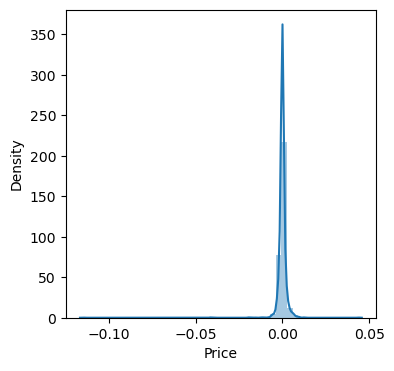

In [62]:
plt.figure(figsize = (4,4))
sns.distplot(y_test-y_test_pred)
plt.show()

<Axes: xlabel='Price'>

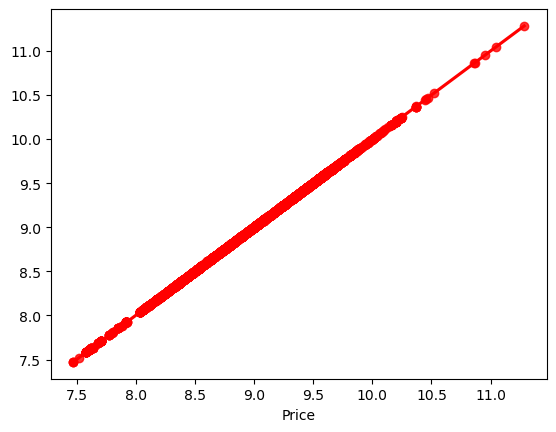

In [63]:
sns.regplot(x=y_train,y=y_train_pred,ci=None,color ='red')

### Save Model

In [64]:
import pickle
#open file where you want to save model
file=open('flight_kN.pkl','wb')
#dumb information to that file
poickle.dumb(K-Neighbors Regressor,file)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2490593398.py, line 5)

In [ ]:
model=open('flight_KN.pkl','rb')
KN=pickle.load(model)

In [ ]:
ypredict=KN.predict(X_test)
ypredict

## Model Comparison Report

When comparing with all models r2 score linear regressor is 0.93,Kneighbour is 1,SVR is 0.95,Decision tree and random forest are 0.99,gradient boosting and XGBR are 1.overall performance is well

## Conclusion 

The r2 score for KNeigbour,Gradient boosting and XGBR are 1,indicating best model on train and test evaluation with less  error.since we can choose anyone of the model.